In [1]:
install.packages('nycflights13')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
install.packages('tidytext')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘SnowballC’, ‘janeaustenr’, ‘tokenizers’




In [3]:
library(tidyverse)
library(lubridate)
library(forcats)
library(nycflights13)
library(tidytext)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.0     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




# Lecture 15: Dates

## 🤔 Quiz

Every year has 365 days:

<ol style="list-style-type: upper-alpha;">
    <li>True</li>
    <li>False</li>
</ol>

## 🤔 Quiz

Every day has 24 hours:

<ol style="list-style-type: upper-alpha;">
    <li>True</li>
    <li>False</li>

</ol>

## 🤔 Quiz

Every minute has 60 seconds:

&nbsp;A.&nbsp;&nbsp;True<br />
&nbsp;B.&nbsp;&nbsp;False<br />
&nbsp;C-E:&nbsp;I am not physically present in this room.

In [ ]:
# answers

## Dates
Most of us have a pretty firm grasp on dates. But they can be more complicated than you might think. Consider these three questions from the book:
* Does every year have 365 days?
* Does every day have 24 hours?
* Does every minute have 60 seconds?

The answer to all three is "no".

As before, we'll rely on the `lubridate` package to work with dates:

In [ ]:
library(lubridate)

There are three different date classes in R:

* A date, printed in tibble as `<date>`, represents a full day on the calendar.
* A time within a day, printed as `<time>`, represents a specific time within an (unspecified) day.
* A date-time is a date plus a time (tibble: `<dttm>`). A date-time uniquely identifies an instant in time (up to a given precision, usually 1 second.)

We've already seen examples of date-times in the `flights` tibble:

In [ ]:
select(flights, time_hour) %>% print

# A tibble: 336,776 x 1
   time_hour          
   <dttm>             
 1 2013-01-01 05:00:00
 2 2013-01-01 05:00:00
 3 2013-01-01 05:00:00
 4 2013-01-01 05:00:00
 5 2013-01-01 06:00:00
 6 2013-01-01 05:00:00
 7 2013-01-01 06:00:00
 8 2013-01-01 06:00:00
 9 2013-01-01 06:00:00
10 2013-01-01 06:00:00
# … with 336,766 more rows


You should tend to favor working with dates over date-times if possible. The latter are more complicated because of the need to handle time zones.



We can get the current date and date-time using the `today()` and `now()` commands:

In [ ]:
today()

[1] "2023-03-15"

In [ ]:
now()

[1] "2023-03-15 08:56:32 EDT"

### Converting strings to dates and times
Frequently you will be encounter date and/or time data stored as text. You will need to convert these data into the native R date classes in order to use date functions on them. The `mdy/ymd/dmy` functions accomplish this.

In [ ]:
ymd("2017 01 31")
mdy("1 31 2017")
dmy("31 1 2017")
dmy("31-Jan-2017")

[1] "2017-01-31"

[1] "2017-01-31"

[1] "2017-01-31"

[1] "2017-01-31"

#### Date-time parsers
There are also equivalent functions for parsing date-times:

In [ ]:
ymd_hms("2017-01-31 20:11:59")

[1] "2017-01-31 20:11:59 UTC"

In [ ]:
mdy_hm("01/31/2017 08:01")

[1] "2017-01-31 08:01:00 UTC"

Sometimes you can get away with calling `as_datetime()`:

In [4]:
as_datetime("2017-01-31 20:11:59")


[1] "2017-01-31 20:11:59 UTC"

But not always:

In [7]:
as_datetime("01/31/2017 08:01")

Warning message:
“All formats failed to parse. No formats found.”


[1] NA

In [9]:
?as_datetime

### Time zones
When we create a date-time, the default time zone is "UTC":

In [ ]:
ymd_hm("2000-01-30 00:00")

[1] "2000-01-30 UTC"

This is a standard time zone which is, for historical reasons, equal to time in Greenwich, England.

If your times are coming from a different time zone you must specify using the `tz=` option:

In [ ]:
ymd_hms("2017-6-30 20:11:59", tz="America/Detroit")
ymd_hms("2017-6-30 20:11:59", tz="America/Los_Angeles")

[1] "2017-06-30 20:11:59 EDT"

[1] "2017-06-30 20:11:59 PDT"

You can find your local time zone using:

In [ ]:
Sys.timezone()

[1] "America/Detroit"

### `strptime()`
Sometimes you are given a weird date format that can't be automatically recognized by any of the preceding methods. As a last resort, you have the `strptime()` function for low-level date parsing.

In [11]:
# date format: (year(month(day))) 
tdy <- "March 15th, 2023"
ymd(tdy)
# strptime

Warning message:
“All formats failed to parse. No formats found.”


[1] NA

In [21]:
strptime("15 March, 2023", tz = "EST")

ERROR: ignored

In [13]:
?strptime

### The epoch
UNIX systems sometimes represent time as "the number of seconds which have elapsed since 1-1-1970." This date is known as "[the epoch](https://en.wikipedia.org/wiki/Unix_time)". So you may occasionally come across date-times that look like:

In [ ]:
now() %>% as.integer() 

[1] 1572358737

To convert these to date format you can use `as_datetime`:

In [ ]:
as_datetime(3600 * 24)  # 24 hours after the epoch

[1] "1970-01-02 UTC"

## 🤔 Quiz

Julian was born on September 22, 2019 at 1:05PM EDT. How many seconds old is Julian?

<ol style="list-style-type: upper-alpha;">
    <li>About $10^7$</li>
    <li>About $10^8$</li>
    <li>About $10^9$</li>
    <li>About $10^{10}$</li>
</ol>

In [ ]:
# second old

### Making a date-time from components
The `make_date` and `make_datetime` functions can make dates from individual (numerical) components:

In [ ]:
make_datetime(2023, 3, 15, 10, 00, 59, tz="EDT")

[1] "2023-03-15 14:00:59 EDT"

#### Example: departure and arrival times in `flights`
The `flights` table has scheduled as well as actual arrival and departure times. Let's create a date-time variable from the actual departure time. First we need to take note of the fact that `dep_time` and `arr_time` are in a weird format:

In [ ]:
flights %>% select(dep_time) %>% head

dep_time
1 517     
2 533     
3 542     
4 544     
5 554     
6 554

In [32]:
# create datetime and sched_dep_time from flights
flights_dt <- flights %>% 
  mutate(across(c(dep_time, sched_dep_time, arr_time, sched_arr_time), 
                          ~ make_datetime(year, month, day, . %/% 100, . %% 100)))

Now we can use built in R command to query and plot these data based on actual departure time:

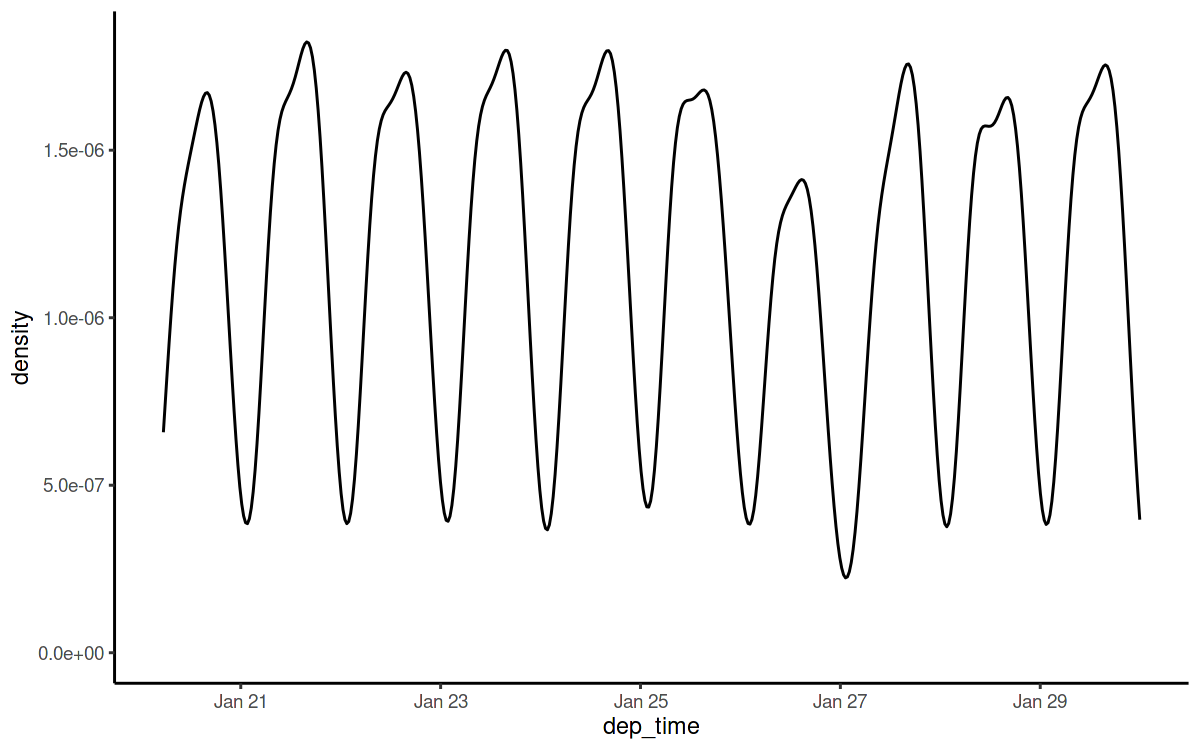

In [ ]:
flights_dt %>% 
  filter(dep_time < ymd(20130130), dep_time >= ymd(20130120)) %>% 
  ggplot(aes(x=dep_time)) + 
  geom_density(bw=3*3600)

In [ ]:
?geom_density

Notice that this command and resulting graph looks much nicer than if we did not use the date classes:
* The filter on `dep_time` looks more natural than `filter(day<2, month==1, year==2013)`.
* We can easily express the bin-width of 600 seconds in `geom_freqpoly(binwidth = 600)`. When you use date-times in a numeric context (like in a histogram), 1 means 1 second; for dates, 1 means 1 day.
* The plot x axis has nice readable labels.

### Date-time components
The functions `year()`, `month()`, `mday()` (day of the month), `yday()` (day of the year), `wday()` (day of the week), `hour()`, `minute()`, and `second()` can extract components from dates and times:

In [ ]:
mdy_hms(c("March 12, 2018 12:00:00")) 

[1] "2018-03-12 12:00:00 UTC"

### Example
By extracting the minute component of scheduled departure time, we uncover a surprising pattern:

Warning message:
“Removed 1 row containing missing values (`geom_line()`).”


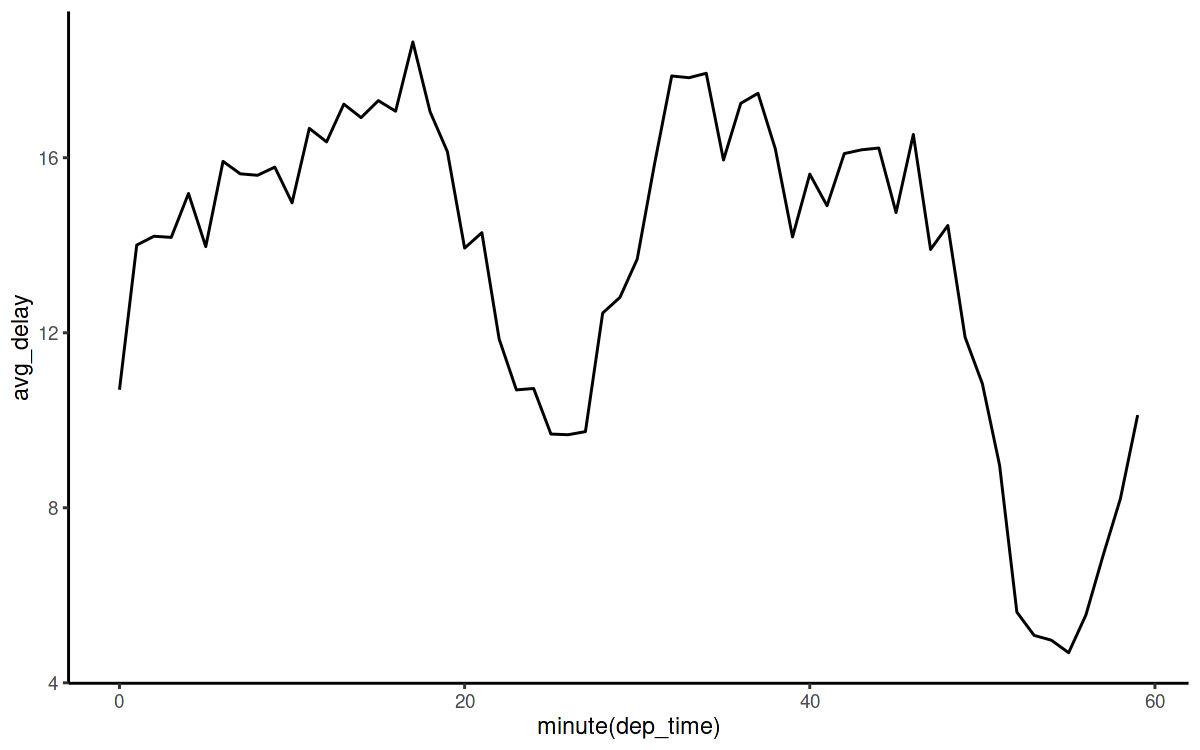

In [ ]:
flights_dt %>% 
  mutate(minute = minute(dep_time)) %>% 
  group_by(minute) %>% 
  summarise(
    avg_delay = mean(dep_delay, na.rm = TRUE),
    n = n()) %>% 
  ggplot(aes(minute, avg_delay)) +
    geom_line() + labs(x="minute(dep_time)")

But when grouped by *scheduled departure*, time the delays seem to be random:

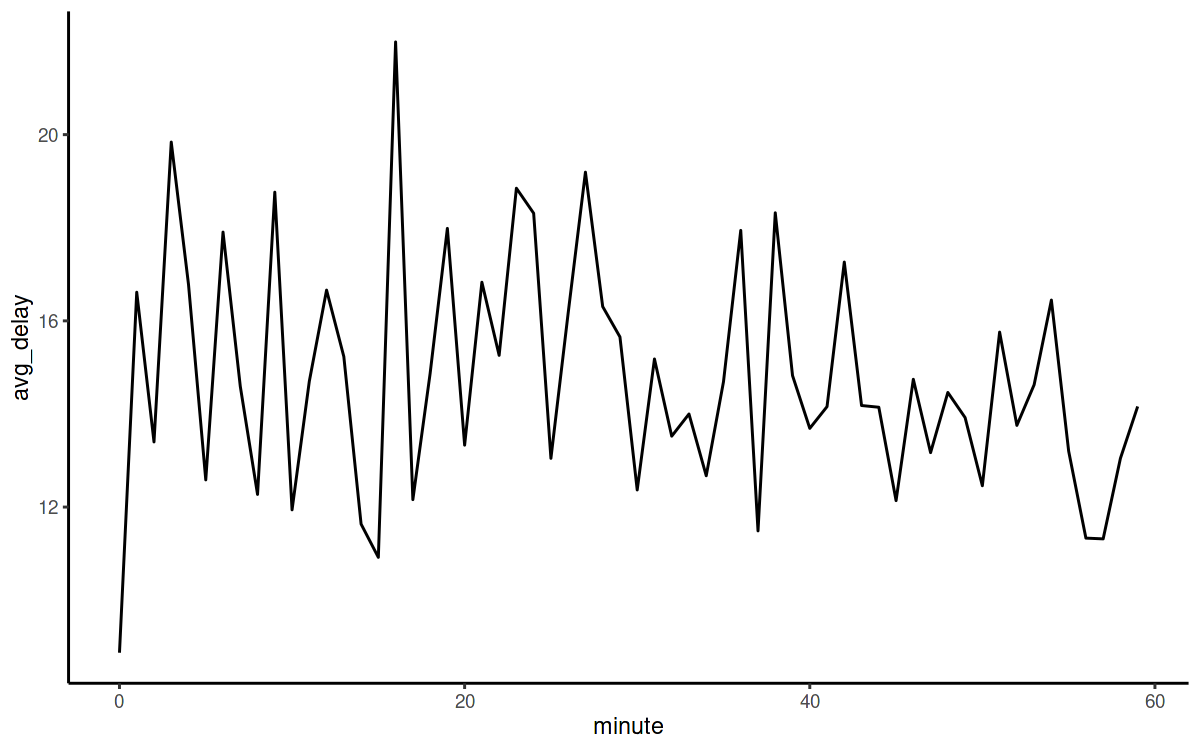

In [ ]:
sched_dep <- flights_dt %>% 
  mutate(minute = minute(sched_dep_time)) %>% 
  group_by(minute) %>% 
  summarise(
    avg_delay = mean(dep_delay, na.rm = TRUE),
    n = n())

ggplot(sched_dep, aes(minute, avg_delay)) +
  geom_line()

What explains this odd pattern? Hint:

### Time spans
Time spans are the difference between two time points. These are represented in R by the `difftime` class:

In [ ]:
(d = today() - update(today(), year=2010))
class(d)

Time difference of 3287 days

[1] "difftime"

Because it is usually simpler to reason about time differences in terms of a single number, `lubridate` also provides a `duration` class which is stored in terms of seconds:

In [ ]:
as.duration(1234)

[1] "1234s (~20.57 minutes)"

In [ ]:
dseconds(10)

[1] "10s"

In [ ]:
dweeks(3)

[1] "1814400s (~3 weeks)"

Arithmetic with durations works as you would expect:

In [ ]:
2 * dyears(1)

[1] "63072000s (~2 years)"

In [ ]:
dyears(1) + dweeks(12) + dhours(15)

[1] "38847600s (~1.23 years)"

You have to be careful when adding durations and dates. What is 1 day after last Saturday at 1pm?

In [ ]:
next_saturday = mdy_hm("Mar. 11, 2023 13:00PM", tz="America/Detroit")
next_saturday + ddays(1)

[1] "2023-03-12 14:00:00 EDT"

To prevent this sort of thing from happening, `lubridate` also offers objects called "periods":

In [ ]:
days(1)
class(days(1))

[1] "1d 0H 0M 0S"

[1] "Period"
attr(,"package")
[1] "lubridate"

Similarly, periods have the expected behaviour if you add one year to a leap year:

In [ ]:
ymd("2020-01-01") + dyears(1)
ymd("2020-01-01") + years(1)

[1] "2020-12-31 06:00:00 UTC"

[1] "2021-01-01"

## 🤔 Quiz

Leo was born on May 16, 2022. When will Leo be 1000 days old?

<ol style="list-style-type: upper-alpha;">
    <li>Today</li>
    <li>January 8, 2024</li>
    <li>February 9, 2025</li>
    <li>March 10, 2026</li>
</ol>

In [ ]:
# 1k days old

#### Using time spans
Earlier in the semester we saw how some flights seem to have arrived before they departed:

In [ ]:
filter(flights, arr_time < dep_time) %>% head %>% print

# A tibble: 6 × 19
   year month   day dep_time sched_dep…¹ dep_d…² arr_t…³ sched…⁴ arr_d…⁵ carrier
  <int> <int> <int>    <int>       <int>   <dbl>   <int>   <int>   <dbl> <chr>  
1  2013     1     1     1929        1920       9       3       7      -4 UA     
2  2013     1     1     1939        1840      59      29    2151      NA 9E     
3  2013     1     1     2058        2100      -2       8    2359       9 UA     
4  2013     1     1     2102        2108      -6     146     158     -12 UA     
5  2013     1     1     2108        2057      11      25      39     -14 UA     
6  2013     1     1     2120        2130     -10      16      18      -2 B6     
# … with 9 more variables: flight <int>, tailnum <chr>, origin <chr>,
#   dest <chr>, air_time <dbl>, distance <dbl>, hour <dbl>, minute <dbl>,
#   time_hour <dttm>, and abbreviated variable names ¹​sched_dep_time,
#   ²​dep_delay, ³​arr_time, ⁴​sched_arr_time, ⁵​arr_delay


This is because these are overnight flights. To fix this, we can now simply add one day to `arr_time`:

In [ ]:
# add one day to arr time

# A tibble: 328,063 x 10
   origin dest  dep_delay arr_delay dep_time            sched_dep_time     
   <chr>  <chr>     <dbl>     <dbl> <dttm>              <dttm>             
 1 EWR    IAH           2        11 2013-01-01 05:17:00 2013-01-01 05:15:00
 2 LGA    IAH           4        20 2013-01-01 05:33:00 2013-01-01 05:29:00
 3 JFK    MIA           2        33 2013-01-01 05:42:00 2013-01-01 05:40:00
 4 JFK    BQN          -1       -18 2013-01-01 05:44:00 2013-01-01 05:45:00
 5 LGA    ATL          -6       -25 2013-01-01 05:54:00 2013-01-01 06:00:00
 6 EWR    ORD          -4        12 2013-01-01 05:54:00 2013-01-01 05:58:00
 7 EWR    FLL          -5        19 2013-01-01 05:55:00 2013-01-01 06:00:00
 8 LGA    IAD          -3       -14 2013-01-01 05:57:00 2013-01-01 06:00:00
 9 JFK    MCO          -3        -8 2013-01-01 05:57:00 2013-01-01 06:00:00
10 LGA    ORD          -2         8 2013-01-01 05:58:00 2013-01-01 06:00:00
# … with 328,053 more rows, and 4 more variables: arr_time <dtt

In [ ]:
How does this affect calculations like average departure delay?

## Trump Twitter data
Let's use what we learned in the past two classes to analyze some real data. 

In [65]:
trump_tweets <- read_csv("https://github.com/MarkHershey/CompleteTrumpTweetsArchive/blob/master/data/realDonaldTrump_in_office.csv?raw=true")

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 23073 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): ID, Tweet URL, Tweet Text
dttm (1): Time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


`trump_tweets` is a dataset of all 23,073 Tweets that Donald Trump sent between taking office and getting kicked off Twitter in Jan 2021.

In [66]:
tail(trump_tweets)

ID               Time               
1 @realDonaldTrump 2021-01-07 03:38:00
2 @realDonaldTrump 2021-01-07 04:13:00
3 @realDonaldTrump 2021-01-07 05:17:00
4 @realDonaldTrump 2021-01-08 08:10:00
5 @realDonaldTrump 2021-01-08 22:46:00
6 @realDonaldTrump 2021-01-08 23:44:00
  Tweet URL                                                     
1 https://twitter.com/realDonaldTrump/status/1346904110969315332
2 https://twitter.com/realDonaldTrump/status/1346912780700577792
3 https://twitter.com/realDonaldTrump/status/1346928882595885058
4 https://twitter.com/realDonaldTrump/status/1347334804052844550
5 https://twitter.com/realDonaldTrump/status/1347555316863553542
6 https://twitter.com/realDonaldTrump/status/1347569870578266115
  Tweet Text                                                                                                                                                                                                                        
1 Please support our Capitol Police and Law Enforcement. They are truly on the side of our Country. Stay peaceful!                                                                                                                  
2 I am asking for everyone at the U.S. Capitol to remain peaceful. No violence! Remember, WE are the Party of Law &amp; Order – respect the Law and our great men and women in Blue. Thank you!                                     
3 https://t.co/Pm2PKV0Fp3                                                                                                                                                                                                           
4 https://t.co/csX07ZVWGe                                                                                                                                                                                                           
5 The 75,000,000 great American Patriots who voted for me, AMERICA FIRST, and MAKE AMERICA GREAT AGAIN, will have a GIANT VOICE long into the future. They will not be disrespected or treated unfairly in any way, shape or form!!!
6 To all of those who have asked

The number of Tweets that Donald Trump has made for each quarter of the year from 2010 to present.

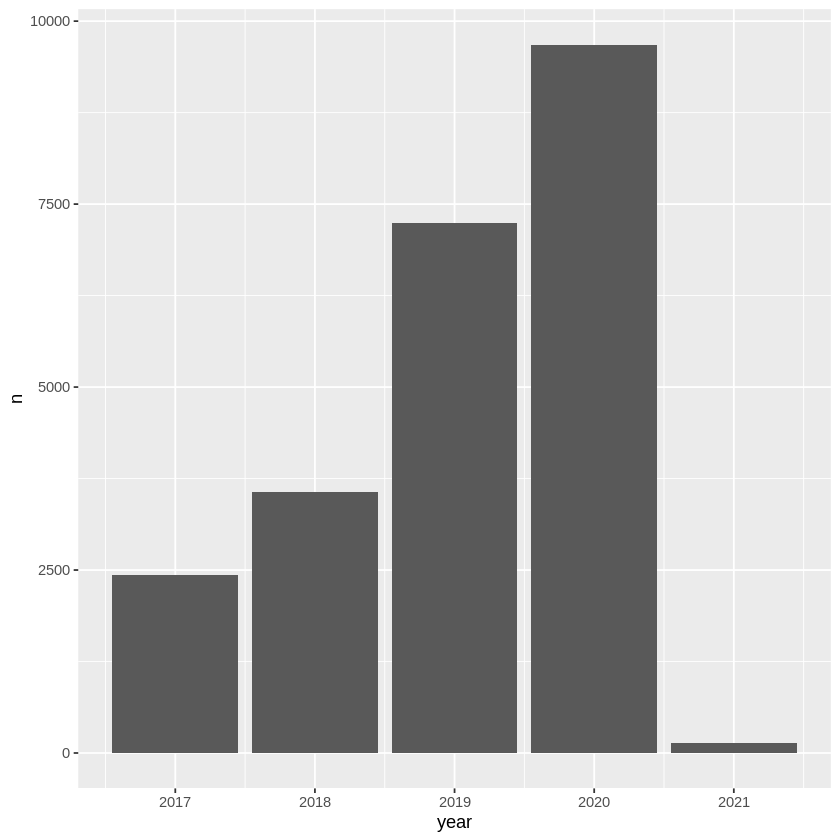

In [76]:
# number of tweets

Recall that `words` contains common English words. After filtering out these words, and all words that were shorter than six characters, the most common words that the President used were. Hint: use anti_join to remove stop_words

In [82]:
stop_words

word        lexicon
1    a           SMART  
2    a's         SMART  
3    able        SMART  
4    about       SMART  
5    above       SMART  
6    according   SMART  
7    accordingly SMART  
8    across      SMART  
9    actually    SMART  
10   after       SMART  
11   afterwards  SMART  
12   again       SMART  
13   against     SMART  
14   ain't       SMART  
15   all         SMART  
16   allow       SMART  
17   allows      SMART  
18   almost      SMART  
19   alone       SMART  
20   along       SMART  
21   already     SMART  
22   also        SMART  
23   although    SMART  
24   always      SMART  
25   am          SMART  
26   among       SMART  
27   amongst     SMART  
28   an          SMART  
29   and         SMART  
30   another     SMART  
⋮    ⋮           ⋮      
1120 went        onix   
1121 were        onix   
1122 what        onix   
1123 when        onix   
1124 where       onix   
1125 whether     onix   
1126 which       onix   
1127 while       onix   
1128 who         onix   
1129 whole       onix   
1130 whose       onix   
1131 why         onix   
1132 will        onix   
1133 with        onix   
1134 within      onix   
1135 without     onix   
1136 work        onix   
1137 worked      onix   
1138 working     onix   
1139 works       onix   
1140 would       onix   
1141 year        onix   
1142 years       onix   
1143 yet         onix   
1144 you         onix   
1145 young       onix   
1146 younger     onix   
1147 youngest    onix   
1148 your        onix   
1149 yours       onix

In [ ]:
# top words

Joining with `by = join_by(word)`
Selecting by n


word            n    
1  america          1130
2  american         1194
3  amp              3468
4  biden             946
5  border            878
6  country          1404
7  democrats        1717
8  election          922
9  fake             1228
10 house             868
11 https           12225
12 media             902
13 news             1526
14 people           2219
15 president        2883
16 realdonaldtrump  2371
17 rt               7582
18 time             1028
19 trump            2249
20 vote              980

What were the president's favorite #hashtags?

In [102]:
# favorite hashtags

trump_tweets %>% 
  mutate(hashtag = str_extract(`Tweet Text`, regex('# ?\\w+\\b'))) %>% 
    count(hashtag) %>% top_n(10)

Selecting by n


hashtag       n    
1  #1               26
2  #AmericaFirst    32
3  #COVID19         49
4  #Dorian          36
5  #FakeNews        25
6  #KAG2020         52
7  #MAGA           392
8  #USMCA           31
9  #coronavirus     24
10 NA            20139

At what hour of the day (or night) is the Donald Trump most likely to tweet, and how has this changed over time?

In [ ]:
# Solution